In [131]:
import pandas as pd
import numpy as np
from HPprophecy import Prophecy
import matplotlib.pyplot as plt
 
%matplotlib inline
 
plt.rcParams['figure.figsize']=(30,10)
plt.style.use('ggplot')

In [132]:
dataF=pd.read_csv('C:/Users/saragada/Desktop/HPI/Forecast/bw/bw.data', sep='\034',encoding='latin-1',error_bad_lines=False)

C:\Users\saragada\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (0,2,10,26,39,40,41,44,45,46,47,49,50,51,52,53,54,55,56,57,58,59) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [253]:
df=dataF.groupby('VAL_DT', as_index=False).agg({"USD_AMT": "sum"})
df=df.reset_index()

In [254]:
df=df[['VAL_DT','USD_AMT']]

In [255]:
df.rename(columns={'VAL_DT': 'ds', 'USD_AMT': 'y'}, inplace=True)


In [256]:
df['ds'] =pd.to_datetime(df.ds)
df=df[(df['ds']<'2018-01-01') & (df['ds']>'2016-08-01')]
df.index = df['ds'] 

In [200]:
df=df.resample('M').sum()
df=df.reset_index()

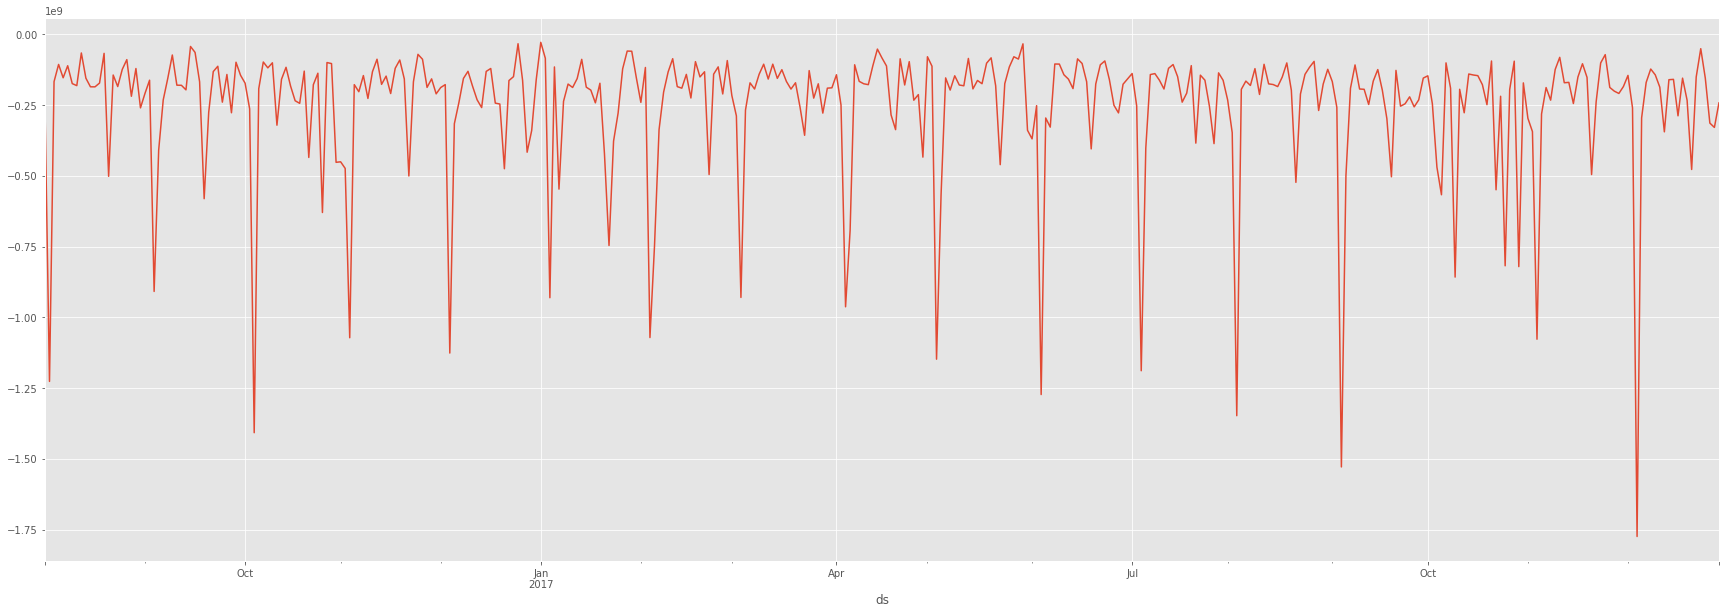

In [257]:
df.set_index('ds').y.plot()

In [202]:
from sklearn.metrics import mean_absolute_error
tuner=pd.DataFrame()
a=list()
b=list()

INFO:HPprophecy.forecaster:Disabling yearly seasonality. Run prophecy with yearly_seasonality=True to override this.
INFO:HPprophecy.forecaster:Disabling daily seasonality. Run prophecy with daily_seasonality=True to override this.
C:\Users\saragada\AppData\Local\Continuum\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


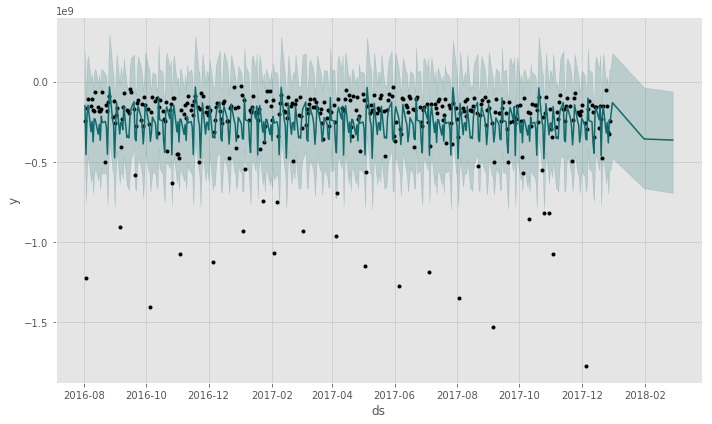

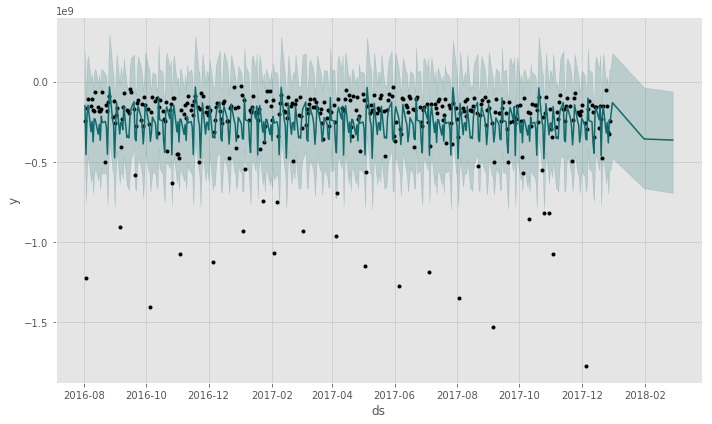

In [258]:

m = Prophecy(changepoint_prior_scale=0.001)
m.add_seasonality(name='monthly', period=12, fourier_order=12,prior_scale=30).fit(df)

future = m.make_future_dataframe(periods=3, freq='M')
forecast = m.predict(future)
m.plot(forecast)



In [259]:
import numpy
import math
from sklearn.metrics import mean_squared_error

In [260]:
math.sqrt(mean_squared_error(forecast['yhat'][:len(df)], df['y']))

236297032.59389445

In [178]:
tuner.to_csv('tunercomp.csv')

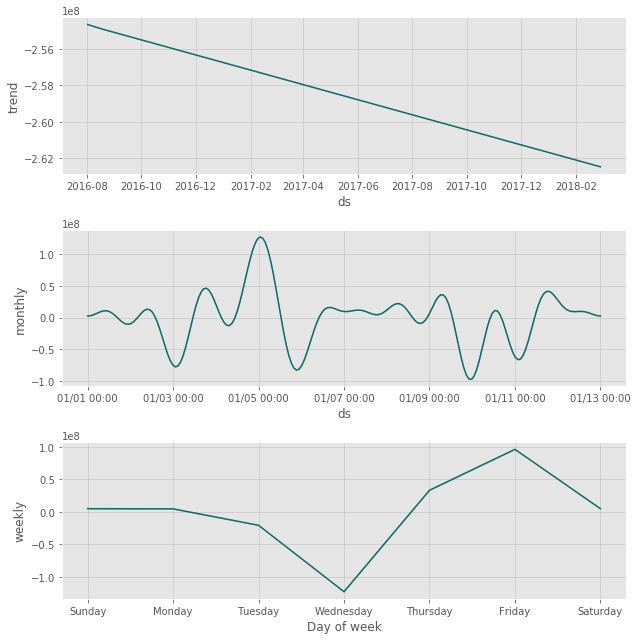

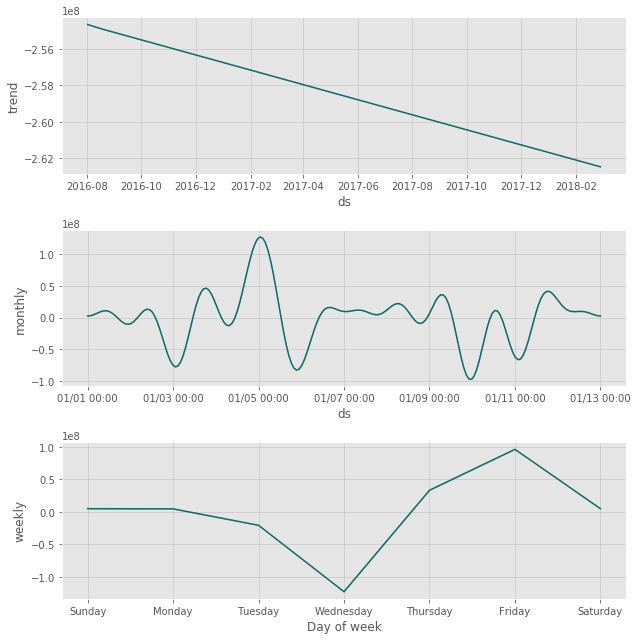

In [261]:
m.plot_components(forecast)

In [268]:
df.set_index('ds', inplace=True)
forecast.set_index('ds', inplace=True)

KeyError: 'ds'

In [263]:
viz_df =df.join(forecast[['yhat', 'yhat_lower','yhat_upper']], how = 'outer')

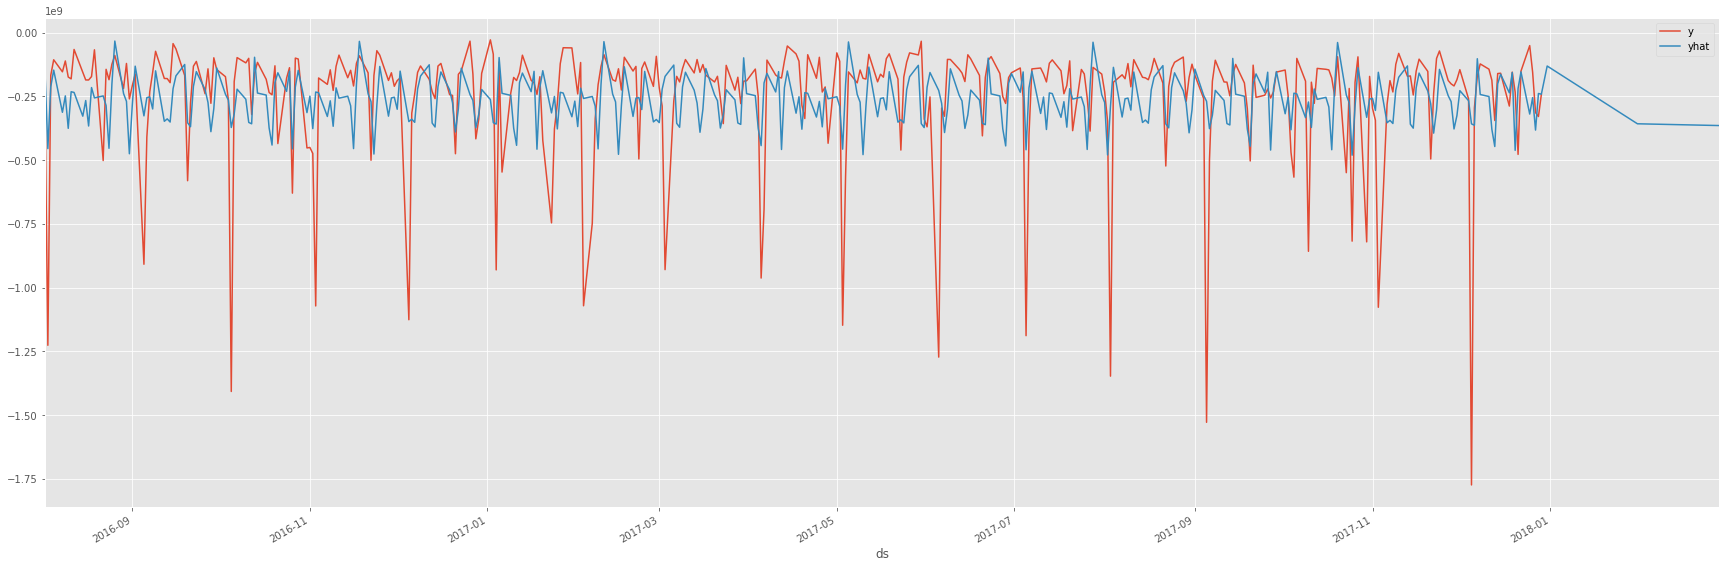

In [264]:
viz_df[['y', 'yhat']].plot()

In [265]:
accuracy=forecast['yhat'][:len(df)]/(df['y'])

In [269]:
forecast

trend   trend_lower   trend_upper    yhat_lower  \
ds                                                                   
2016-08-02 -2.546472e+08 -2.546472e+08 -2.546472e+08 -4.611478e+08   
2016-08-03 -2.546625e+08 -2.546625e+08 -2.546625e+08 -7.508608e+08   
2016-08-04 -2.546777e+08 -2.546777e+08 -2.546777e+08 -5.328664e+08   
2016-08-05 -2.546930e+08 -2.546930e+08 -2.546930e+08 -4.567807e+08   
2016-08-08 -2.547387e+08 -2.547387e+08 -2.547387e+08 -6.276423e+08   
2016-08-09 -2.547539e+08 -2.547539e+08 -2.547539e+08 -5.620559e+08   
2016-08-10 -2.547692e+08 -2.547692e+08 -2.547692e+08 -6.982413e+08   
2016-08-11 -2.547844e+08 -2.547844e+08 -2.547844e+08 -5.800688e+08   
2016-08-12 -2.547996e+08 -2.547996e+08 -2.547996e+08 -5.310837e+08   
2016-08-15 -2.548454e+08 -2.548454e+08 -2.548454e+08 -6.143611e+08   
2016-08-16 -2.548606e+08 -2.548606e+08 -2.548606e+08 -5.695846e+08   
2016-08-17 -2.548759e+08 -2.548759e+08 -2.548759e+08 -6.750030e+08   
2016-08-18 -2.548911e+08 -2.548911e+08 -2.548911e+08 -5.349896e+08   
2016-08-19 -2.549047e+08 -2.549047e+08 -2.549047e+08 -5.742733e+08   
2016-08-22 -2.549453e+08 -2.549453e+08 -2.549453e+08 -5.691706e+08   
2016-08-23 -2.549589e+08 -2.549589e+08 -2.549589e+08 -5.766356e+08   
2016-08-24 -2.549724e+08 -2.549724e+08 -2.549724e+08 -7.712961e+08   
2016-08-25 -2.549860e+08 -2.549860e+08 -2.549860e+08 -5.221582e+08   
2016-08-26 -2.549996e+08 -2.549996e+08 -2.549996e+08 -3.651517e+08   
2016-08-29 -2.550402e+08 -2.550402e+08 -2.550402e+08 -5.578453e+08   
2016-08-30 -2.550538e+08 -2.550538e+08 -2.550538e+08 -5.788254e+08   
2016-08-31 -2.550673e+08 -2.550673e+08 -2.550673e+08 -7.829669e+08   
2016-09-01 -2.550809e+08 -2.550809e+08 -2.550809e+08 -5.908286e+08   
2016-09-02 -2.550945e+08 -2.550945e+08 -2.550945e+08 -4.311220e+08   
2016-09-05 -2.551351e+08 -2.551351e+08 -2.551351e+08 -6.328080e+08   
2016-09-06 -2.551487e+08 -2.551487e+08 -2.551487e+08 -5.703163e+08   
2016-09-07 -2.551623e+08 -2.551623e+08 -2.551623e+08 -5.632408e+08   
2016-09-08 -2.551758e+08 -2.551758e+08 -2.551758e+08 -6.081166e+08   
2016-09-09 -2.551894e+08 -2.551894e+08 -2.551894e+08 -4.621148e+08   
2016-09-12 -2.552300e+08 -2.552300e+08 -2.552300e+08 -6.474689e+08   
...                  ...           ...           ...           ...   
2017-11-23 -2.611549e+08 -2.611549e+08 -2.611549e+08 -6.031920e+08   
2017-11-24 -2.611685e+08 -2.611685e+08 -2.611685e+08 -4.577894e+08   
2017-11-27 -2.612091e+08 -2.612091e+08 -2.612091e+08 -5.674320e+08   
2017-11-28 -2.612227e+08 -2.612227e+08 -2.612227e+08 -5.874565e+08   
2017-11-29 -2.612363e+08 -2.612363e+08 -2.612363e+08 -6.929701e+08   
2017-11-30 -2.612498e+08 -2.612498e+08 -2.612498e+08 -6.324017e+08   
2017-12-01 -2.612634e+08 -2.612634e+08 -2.612634e+08 -5.552654e+08   
2017-12-04 -2.613040e+08 -2.613040e+08 -2.613040e+08 -5.937496e+08   
2017-12-05 -2.613176e+08 -2.613176e+08 -2.613176e+08 -6.842298e+08   
2017-12-06 -2.613312e+08 -2.613312e+08 -2.613312e+08 -6.531807e+08   
2017-12-07 -2.613447e+08 -2.613447e+08 -2.613447e+08 -4.184812e+08   
2017-12-08 -2.613583e+08 -2.613583e+08 -2.613583e+08 -5.442669e+08   
2017-12-11 -2.613990e+08 -2.613990e+08 -2.613990e+08 -5.614414e+08   
2017-12-12 -2.614125e+08 -2.614125e+08 -2.614125e+08 -6.968633e+08   
2017-12-13 -2.614261e+08 -2.614261e+08 -2.614261e+08 -7.436565e+08   
2017-12-14 -2.614396e+08 -2.614396e+08 -2.614396e+08 -5.011908e+08   
2017-12-15 -2.614532e+08 -2.614532e+08 -2.614532e+08 -4.492077e+08   
2017-12-18 -2.614939e+08 -2.614939e+08 -2.614939e+08 -5.509507e+08   
2017-12-19 -2.615074e+08 -2.615074e+08 -2.615074e+08 -4.455099e+08   
2017-12-20 -2.615210e+08 -2.615210e+08 -2.615210e+08 -7.698461e+08   
2017-12-21 -2.615345e+08 -2.615345e+08 -2.615345e+08 -5.350803e+08   
2017-12-22 -2.615481e+08 -2.615481e+08 -2.615481e+08 -4.662756e+08   
2017-12-25 -2.615888e+08 -2.615888e+08 -2.615888e+08 -6.354137e+08   
2017-12-26 -2.616023e+08 -2.616023e+08 -2.616023e+08 -5.590995e+08   
2017-12-27 -2.616159e+08 -2.6

In [271]:
forecast=forecast.reset_index()

In [274]:
forecast['ds'] =pd.to_datetime(forecast.ds)

In [275]:
forecast=forecast.resample('M').sum()
forecast=forecast.reset_index()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [22]:
p=pd.DataFrame()

In [ ]:
p['fcst']=k

In [ ]:
p.to_csv('data1.csv')

In [ ]:
type(fcst)

In [ ]:
type(data['y'])

In [23]:
k=pd.DataFrame(data['y'])

In [24]:
p['y']=k

In [29]:
p['fcst']=pd.DataFrame(fcst['yhat'])

In [30]:
p['date']=pd.DataFrame(fcst['ds'])

In [31]:
p.to_csv('predict.csv')

In [32]:
import matplotlib.pyplot as plt
 
%matplotlib inline #only needed for jupyter
 
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')

UsageError: unrecognized arguments: #only needed for jupyter


In [58]:
df.set_index('ds', inplace=True)
fcst.set_index('ds', inplace=True)

In [59]:

viz_df = df.join(fcst[['yhat', 'yhat_lower','yhat_upper']], how = 'outer')
del viz_df['y']


KeyError: 'index'

In [63]:
df.index = pd.to_datetime(df.index)
last_date = df.index[-1]

In [69]:
def plot_data(func_df, end_date):
    end_date = end_date - timedelta(weeks=4) # find the 2nd to last row in the data. We don't take the last row because we want the charted lines to connect
    mask = (func_df.index > end_date) # set up a mask to pull out the predicted rows of data.
    predict_df = func_df.loc[mask] # using the mask, we create a new dataframe with just the predicted data.
   
# Now...plot everything
    fig, ax1 = plt.subplots()
    ax1.plot(df.y)
    ax1.plot((np.exp(predict_df.yhat)), color='black', linestyle=':')
    ax1.fill_between(predict_df.index, np.exp(predict_df['yhat_upper']), np.exp(predict_df['yhat_lower']), alpha=0.5, color='darkgray')
    ax1.set_title('Sales (Orange) vs Sales Forecast (Black)')
    ax1.set_ylabel('Dollar Sales')
    ax1.set_xlabel('Date')
    
  
# change the legend text
    L=ax1.legend() #get the legend
    L.get_texts()[0].set_text('Actual Sales') #change the legend text for 1st plot
    L.get_texts()[1].set_text('Forecasted Sales') #change the legend text for 2nd plot


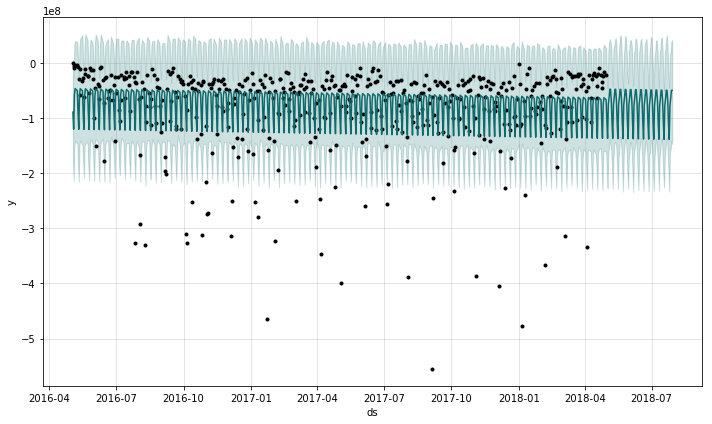

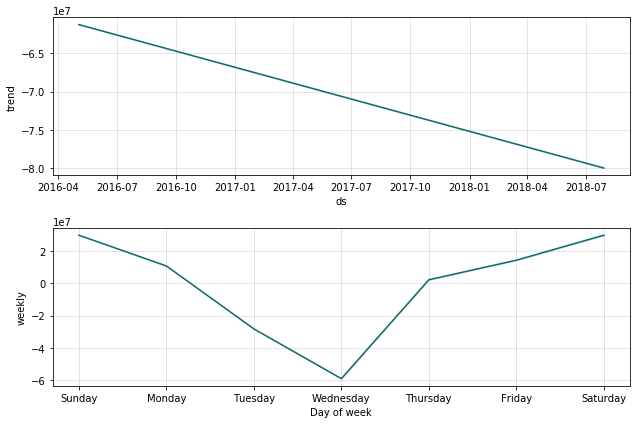

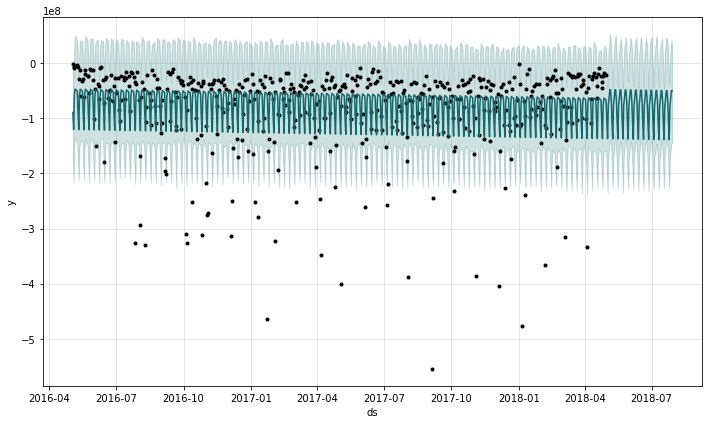

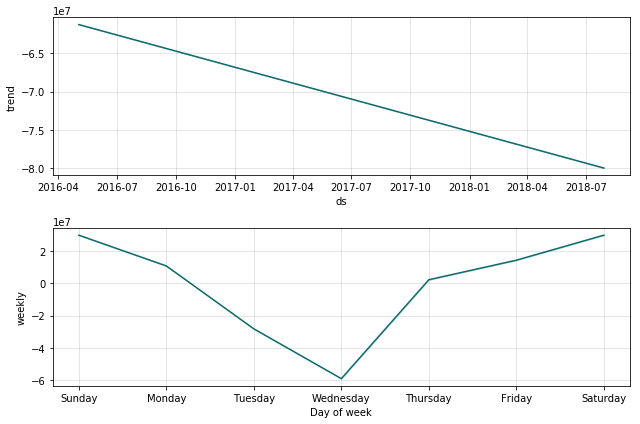

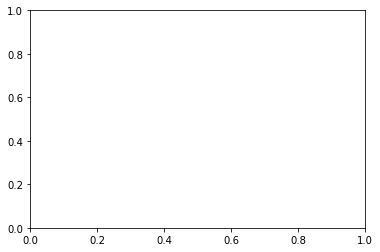

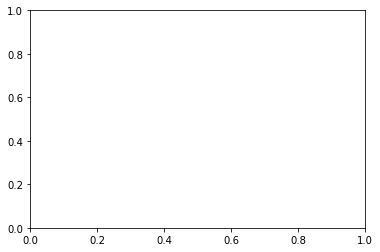

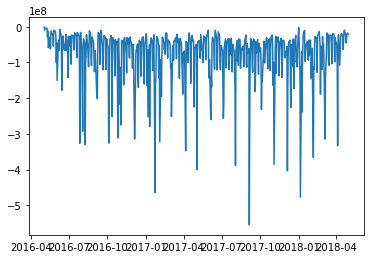

In [70]:
plt.show()

In [128]:
datac=viz_df[['y', 'yhat']]

In [129]:
datac.to_csv('pred&act.csv')

In [184]:
actF=dataF.groupby('VAL_DT', as_index=False).agg({"USD_AMT": "sum"})

In [185]:
actF=actF.reset_index()

In [186]:
actF=actF[['VAL_DT','USD_AMT']]

In [187]:
actF.rename(columns={'VAL_DT': 'ds', 'USD_AMT': 'y'}, inplace=True)

In [188]:
actF['ds'] =pd.to_datetime(actF.ds)
actF=actF[actF['ds']>'2017-12-31']
actF.index = actF['ds'] 

In [189]:
actF=actF.resample('M').sum()
actF=actF.reset_index()

In [190]:
p=actF[:3]

In [191]:
p

ds             y
0 2018-01-31 -7.200365e+09
1 2018-02-28 -6.187881e+09
2 2018-03-31 -5.605779e+09

In [192]:
q=forecast['yhat'][len(df):]

In [193]:
q

ds
2018-01-31   -6.198720e+09
2018-02-28   -6.649375e+09
2018-03-31   -6.386327e+09
Name: yhat, dtype: float64